In [40]:
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import scipy.stats
import math
import statistics
import seaborn as sns

import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

In [41]:
# choix du nombre de composantes à calculer
n_comp = 6

In [42]:
data = pd.read_csv("../kc_house_data.csv")
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890.0,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715.0,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060.0,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050.0,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890.0,0,2003,0,98038,47.3684,-122.031,2390,7570


In [43]:
# selection des colonnes à prendre en compte dans l'ACP
data_pca = data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']]

In [44]:
# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values

names = data["id"] # ou data.index pour avoir les intitulés
features = data.columns

In [45]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [46]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

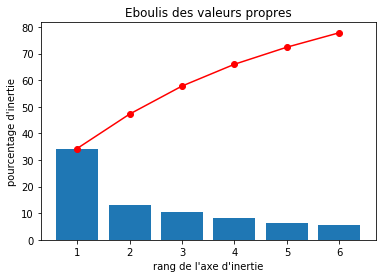

In [47]:
# Eboulis des valeurs propres
display_scree_plot(pca)

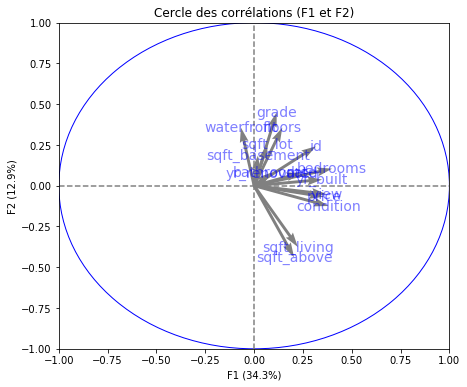

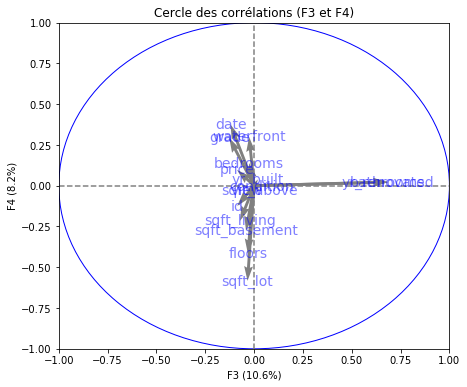

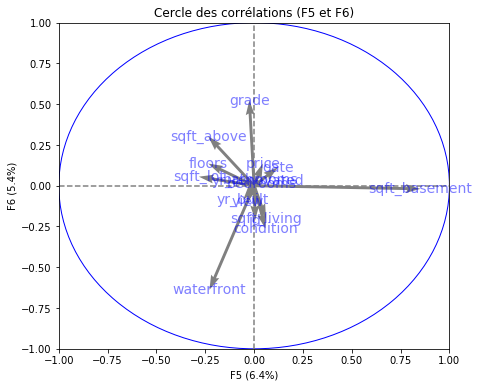

In [48]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

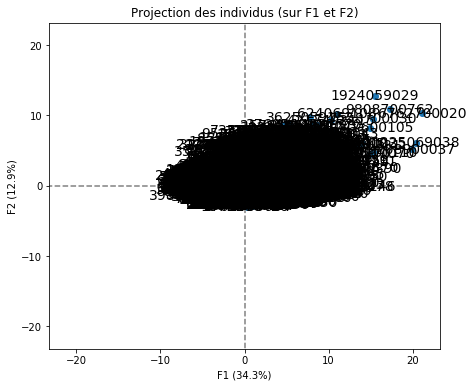

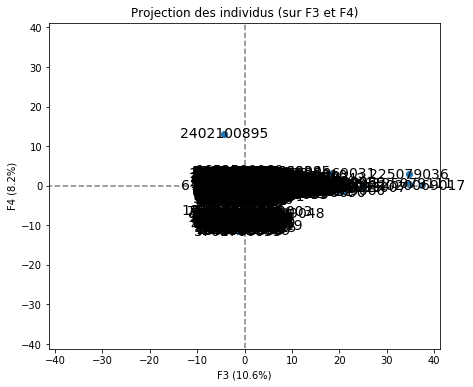

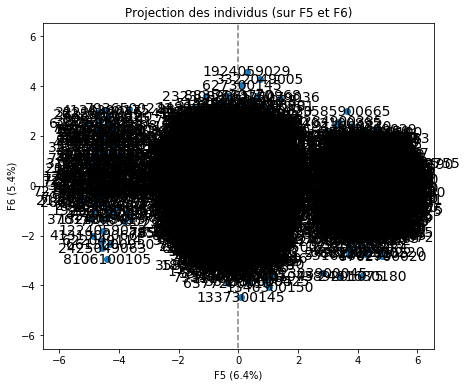

In [52]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))

plt.show()

In [54]:
print(pca.components_)
print(X_projected.shape)

[[ 0.31659312  0.24138905  0.35704055  0.39895892  0.0865919   0.22383769
   0.06859297  0.14428743 -0.06757411  0.37032263  0.38069602  0.11561068
   0.20461888  0.01973525  0.34811428  0.09102915]
 [ 0.24144809  0.07892464 -0.06790014  0.10457744  0.07967108 -0.3758105
   0.2519483   0.356354    0.35627287 -0.05198651 -0.12429716  0.44959099
  -0.43874155  0.18593803  0.037854    0.07851687]
 [-0.08663072 -0.12057337 -0.08740866 -0.0258511   0.68472065 -0.07198076
  -0.03379287 -0.03234164 -0.02561055 -0.03761122  0.03952218 -0.12759634
   0.02681594 -0.04163407  0.019084    0.68608095]
 [-0.12444709  0.37462973  0.09707185  0.13888746  0.02160584 -0.21505882
  -0.5835063  -0.41520915  0.29911913 -0.03194079 -0.00299454  0.29382402
  -0.02816821 -0.276076    0.03863492  0.02279055]
 [ 0.00540588  0.12149707  0.04437155  0.0403988   0.03376818  0.06073344
  -0.28271798 -0.2350022  -0.2289294  -0.03256511  0.05785477 -0.02441014
  -0.23506511  0.85169575 -0.05590454  0.02110105]
 [-0.2

Text(0, 0.5, 'F2(12.9%)')

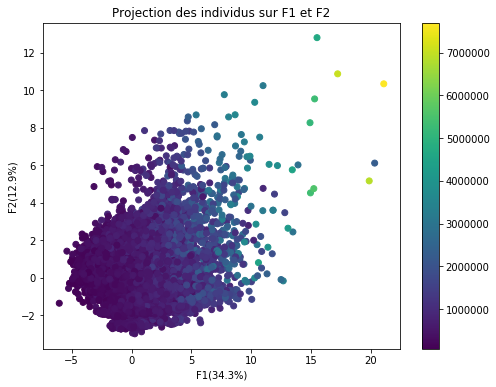

In [56]:
plt.figure(figsize=(8,6))

colors = ['r', 'g', 'b']
plt.scatter(X_projected[:,0], X_projected[:,1], c=data["price"])
plt.title('Projection des individus sur F1 et F2')
plt.colorbar()
plt.xlabel("F1(34.3%)")
plt.ylabel("F2(12.9%)")

Text(0, 0.5, 'F4(8.2%)')

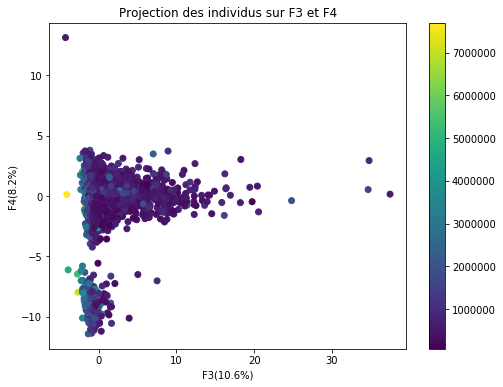

In [57]:
plt.figure(figsize=(8,6))

colors = ['r', 'g', 'b']
plt.scatter(X_projected[:,2], X_projected[:,3], c=data["price"])
plt.title('Projection des individus sur F3 et F4')
plt.colorbar()
plt.xlabel("F3(10.6%)")
plt.ylabel("F4(8.2%)")

Text(0, 0.5, 'F6(5.4%)')

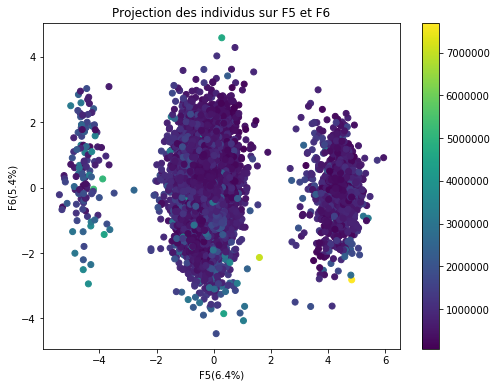

In [59]:
plt.figure(figsize=(8,6))

colors = ['r', 'g', 'b']
plt.scatter(X_projected[:,4], X_projected[:,5], c=data["price"])
plt.title('Projection des individus sur F5 et F6')
plt.colorbar()
plt.xlabel("F5(6.4%)")
plt.ylabel("F6(5.4%)")

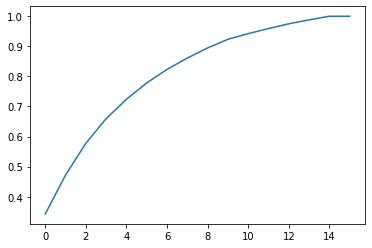

In [62]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [67]:
np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95)

11

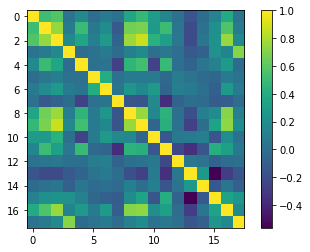

In [49]:
A = np.array(data, dtype=np.float32)
plt.imshow(np.corrcoef(A.T))
plt.colorbar()